In [2]:
# 1. Imports

# Import PyTorch core and submodules for neural networks, optimization, and data loading
import sys
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Add the parent directory to sys.path so Python can find the 'src' package
sys.path.append(os.path.abspath(os.path.join('..')))

# Import matplotlib for plotting training curves
import matplotlib.pyplot as plt

# Import custom dataset, transforms, and training utilities from project source
from src.data_loading import APTOSDataset, get_default_transforms
from src.train import get_model, train_one_epoch, evaluate

In [3]:
# 2. Config

# Set device to GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Display the selected device
device

device(type='cpu')

In [4]:
# 3. Upload dataset

# Initialize training dataset with CSV labels and image directory, applying default transforms
train_dataset = APTOSDataset(
    csv_path="../data/raw/train.csv",
    images_dir="../data/raw/train_images",
    transform=get_default_transforms()
)

# Create DataLoader for batching and shuffling training data
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [5]:
# 4. Create model, loss and optimiser

# Instantiate the model and move it to the selected device
model = get_model().to(device)

# Define the loss function as cross-entropy for classification
criterion = nn.CrossEntropyLoss()

# Set up Adam optimizer with learning rate 1e-4
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [6]:
# 5. Training 

# Number of epochs to train
num_epochs = 3

# List to store training loss values per epoch
train_losses = []

# Training loop over epochs
for epoch in range(num_epochs):
    # Train model for one epoch and get loss
    loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    # Append loss to list for later visualization
    train_losses.append(loss)
    # Print progress with current epoch and loss
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {loss:.4f}")

Epoch 1/3 - Loss: 0.6445
Epoch 2/3 - Loss: 0.4119
Epoch 3/3 - Loss: 0.2879


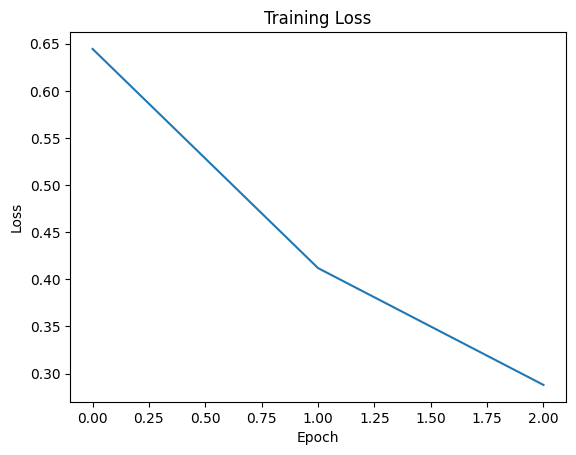

In [7]:
# 6. Display loss curve

# Plot training loss curve over epochs
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [8]:
# 7. Save model

# Save the trained model's state dictionary to a file
torch.save(model.state_dict(), "../models/baseline_resnet18.pth")

In [9]:
# 8. Example predictions

# Set model to evaluation mode
model.eval()

# Get a batch of images and labels from the training loader
images, labels = next(iter(train_loader))
# Move images and labels to the device
images, labels = images.to(device), labels.to(device)

# Disable gradient calculation for inference
with torch.no_grad():
    # Forward pass to get model outputs
    outputs = model(images)
    # Get predicted class indices
    preds = outputs.argmax(dim=1)

# Convert first 10 predictions and labels to numpy arrays for inspection
preds[:10].cpu().numpy(), labels[:10].cpu().numpy()

(array([0, 0, 2, 0, 1, 2, 0, 2, 0, 0]), array([0, 0, 2, 0, 1, 2, 0, 2, 0, 0]))

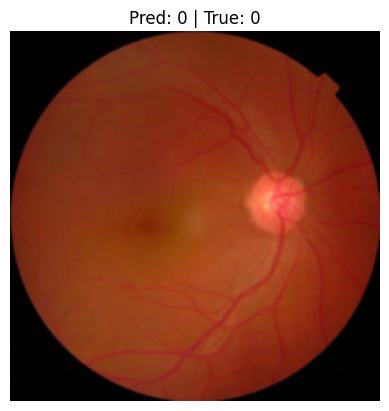

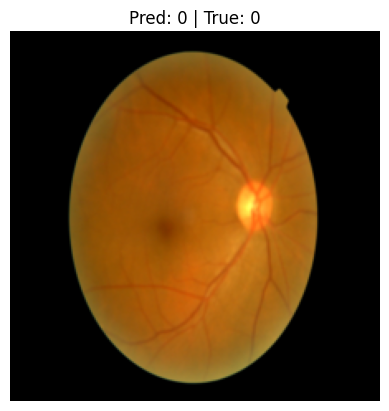

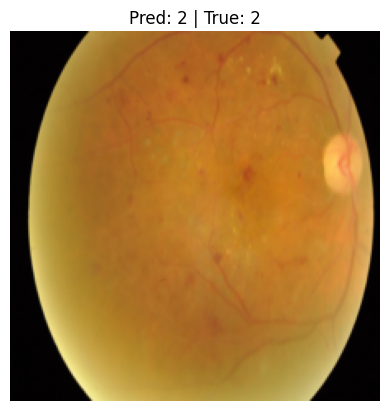

In [10]:
# 9. Display images with prediction

# Function to display an image tensor with a title
def show_image(img_tensor, title):
    # Convert tensor from CxHxW to HxWxC and move to CPU numpy array
    img = img_tensor.permute(1, 2, 0).cpu().numpy()
    # Display the image
    plt.imshow(img)
    # Set the title with prediction and true label
    plt.title(title)
    # Hide axis
    plt.axis("off")
    # Show the plot
    plt.show()

# Show first 3 images with predicted and true labels
for i in range(3):
    show_image(images[i], f"Pred: {preds[i].item()} | True: {labels[i].item()}")